## Inferencias acerca de de los parámetros del modelo

#### Ejemplo Intervalo de confianza para $\beta_1$

Las variaciones del peso de mampostería de ladrillos de arcilla tienen implicaciones no sólo para diseño estructural y acústico sino también para el diseño de sistemas de calefacción, ventilación y aire acondicionado. El artículo “Clay Brick Masonry Weight Variation” (J. of Architectural Engr., 1996) incluye una gráfica de puntos de y=densidad de mortero en seco $(lb/pie^3)$ contra x=contenido de aire del mortero $(\%)$ para una muestra de especímenes de mortero, de donde se tomaron los siguientes datos representativos: 

In [14]:
datos_x = [5.7, 6.8, 9.6, 10, 10.7, 12.6, 14.4, 15, 15.3, 16.2, 17.8, 18.7, 19.7, 20.6, 25]
datos_y = [119, 121.3, 118.2, 124, 112.3, 114.1, 112.2, 115.1, 111.3, 107.2, 108.9, 107.8, 111, 106.2, 105]

Identifique si existe una relación entre las variables. Encuentre el modelo de regresión lineal simple mediante la estimación de mínimos cudrados de la verdadera recta de regresión. ¿Que proporción de la variación de la densidad de mortero en seco se explica con la relación que existe con el contenido de aire del mortero? ¿Cual es la fuerza de relación entre la densidad de mortero en seco y el contenido de aire del mortero? Encuentre un intervalo de confianza de $95\%$ para $\beta_1$.

Como primer paso en un análisis de regresión se comienza por realizar un diagrama de dispersión para identificar de manera visual si existe una realción entre las variables. Esto lo podemos realizar mediante código que se revisó anteriormente.

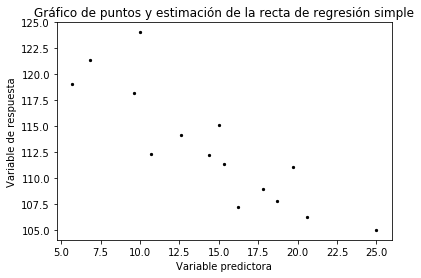

In [15]:
# Se importa librería matplotlib para realizar la gráfica de puntos
# En caso de no mostrar el gráfico, volver a correr esta celda
import matplotlib.pyplot as plt

plt.scatter(x=datos_x , y=datos_y,  marker='o', c='black', s=5)
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.show()
plt.show()

El gráfico anterior sugiere una relación entre ambas variables. Valores chicos de $x$ se encuentran pareados con valores grandes $y$, mientras que valores grandes de $x$, estan pareados con valores chicos de $y$. La relación lineal es negativa. La gráfica puede ser soportar la desición de utilizar un modelo de regresión lineal simple para explicar el comportameinto de la variable $y$, utilizando la información de la variable $x$.  Utilizando el código desarrollado en laboratorios anteriores para realizar los cálculos necesarios por medio de MMC (método de mínimos cuadrados) y encontrar el valor de $\hat{\beta}_0$ y $\hat{\beta}_1$.

In [16]:
# Importamos la librería numpy para la simplificación de operaciones
import numpy as np

# Generar arrays donde se almacenan los datos contenidos en las listas datos_x y datos_ y
array_x = np.array(datos_x)
array_y = np.array(datos_y)

# Se generan las estadísticas involucradas en la estimación de la ecuación de regresión
n = len(array_x)
sum_x = sum(array_x)
sum_y = sum(array_y)
sum_xy = sum(array_x*array_y)
sum_xx = sum(array_x*array_x)
sum_yy = sum(array_y*array_y)

Con estas estadísticas computadas se pueden generar los valores de $S_{xx}$, $S_{xy}$, $\hat{\beta}_{1}$, y $\hat{\beta}_{0}$

In [17]:
# Se obtienen los valores
s_xy = sum_xy-(1/n)*sum_x*sum_y
s_xx = sum_xx-(1/n)*sum_x**2

beta_1 = s_xy / s_xx
beta_0 = (1/n)*sum_y - beta_1*(1/n)*sum_x

# Imprimir los resultados
print("La estimación de los parámetros para el modelo de regresión son: ")
print("beta1: "+str(beta_1))
print("beta0: "+str(beta_0))

La estimación de los parámetros para el modelo de regresión son: 
beta1: -0.9176218965296167
beta0: 126.24888904220731


Estos resultados nos llevan a concluir el siguiente modelo de regresión para los datos dados:
$$ y =  \hat{\beta}_{0} + \hat{\beta}_{1}*x = 126.2488 - 0.9176*x$$

Este resultado es consistente con la gráfica generada anteriormente, ya que $\hat{\beta}_1$, que representa la pendiente de la recta de regresión es negativo. Ahora podemos generar un gráfico de dispersión con la linea de regresión ajustada.

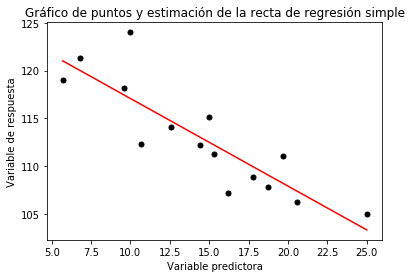

In [19]:
# Se importa librería matplotlib para realizar la gráfica de puntos
import matplotlib.pyplot as plt

plt.scatter(x=datos_x , y=datos_y,  marker='o', c='black', s=25)
plt.plot(array_x, beta_0 + beta_1 * array_x, '-', c='red')
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.show()

¿Que proporción de la variación observada de $y$ se podría explicar con la relación del modelo? Para contestar esta pregunta utilizamos el coeficiente de determinación, que nos indica que cantidad de la varianza total en $y$, es explicada por el modelo de regresión. Recordemos la definición del coeficiente de determinación:

$$ r^2 = \frac{SSR}{SST} = \frac{SST-SSE}{SST} = 1-\frac{SSE}{SST} $$

In [20]:
# Relizamos las operaciones para calcular el coeficiente de determinación
sse = sum_yy - beta_0*sum_y - beta_1*sum_xy    #SSE Suma de cuadrados del error
sst = sum_yy - (1/n)*sum_y**2     #SST Suma total de cuadrados

coef_determ = 1-sse/sst   #Coeficiente de determianción

print("El coeficiente de determianción del modelo es: ",coef_determ)

El coeficiente de determianción del modelo es:  0.7524199448853097


Aproximadamente 75% de la variación total de la densidad observada puede ser atribuido a la relación de modelo de regresión lineal simple entre la densidad y el contenido de aire. 

La fuerza de relación entre las variables se obtiene con el valor de la correlación muestral. Recordemos también que el valor absoluto del valor de la correlación muestral se puede obtener como raíz cuadrada del coeficiente de determinación, sin embargo este no nos indica si la relación es positiva o negativa.

In [21]:
# Tenemos calculados los terminos necesarios para calcular la correlación
s_xy = sum_xy-(1/n)*sum_x*sum_y
s_xx = sum_xx-(1/n)*sum_x**2
s_yy = sum_yy-(1/n)*sum_y**2

corr = s_xy/((s_xx**(1/2))*(s_yy**(1/2)))

print("El coeficiente de correlación muestral es: ",corr)

El coeficiente de correlación muestral es:  -0.867421434416544


Por lo tanto la fuerza de la relación entre las variables $x$ y $y$ es de -0.8674

Ahora toca el turno de obtener el intervalo de confianza para $\hat{\beta}_1$. El cual tiene la siguiente forma:

$$ \hat{\beta}_1 \pm t_{\alpha/2,n-2} \cdot s_{\hat{\beta}_1} $$

Notemos que el valor de $\hat{\beta}_1$ ya ha sido calculado, el valor crítico de $t_{\alpha/2,n-2}$ se obtiene desde una tabla t-Student, por lo que solo nos falta obtener la desviación estandar de $\hat{\beta}_1$: 

$$ s_{\hat{\beta}_1} = \frac{s}{\sqrt{S_{xx}}} $$

Esto implica que para obtener $s_{\hat{\beta}_1}$ que es la variación del parámetro $\hat{\beta}_1$ debemos obtener primero la estimación $s$, que representa la estimación de la desviación del error sobre la recta de regresión.

La estimación de la varianza del error sobre la recta de regresión $(s^2)$ quedó definida como la suma de los cuadrados del error (las distancias verticales desde la línea de regresión a los puntos observados) dividida sobre los grados de libertad. La suma de cuadrados del error $(SSE)$, ya fue calculada en la celda de código anterior y guardada en la variable sse.

In [24]:
# Imprimir el valor de la suma de cuadrados del error
print("La suma de cuadrados del error es: ", sse)

La suma de cuadrados del error es:  112.44326857805936


El grado de libertad debido al error es $15-2=13$, así podemos obtener $s^2 = 112.4432/13 = 8.6495$ y por lo tanto, $s=2.941$. La desviación estándar estimada de $\hat{\beta}_1$ es entonces:

$$ s_{\hat{\beta}_1} = \frac{s}{\sqrt{S_{xx}}} = \frac{2.941}{\sqrt{405.836}} = 0.1460 $$



El valor crítico total $t$ para un nivel de confianza de $95\%$ con 13 grados de libertad es $t_{0.025, 13}=2.160$. El intervalo de confianza para $\hat{\beta}_1$ queda como:

$$ \hat{\beta}_1 \pm t_{\alpha/2,n-2} \cdot s_{\hat{\beta}_1} $$
$$=-0.918 \pm (2.160)(0.1460)$$
$$=-0.918 \pm 0.315$$
$$=(-1.233,-0.603)$$

Con alto grado de confianza, estimamos que una disminución de densidad entre 0.603 y 1.233 se asocia con un aumento de 1% en contenido de aire. Observe que el intervalo solo incluye valores negativos por lo que podemos estar confiar en la tendencia de la densidad, que disminuye a medida que aumenta el contenido de aire.

**RECORDATORIO**
Para hacer inferencias o generar intervalos de confianza sobre $\beta_0$ y $\beta_1$ (y otras estadísticas), es necesario llegar a una estimación del parámetro poblacional $\sigma^2$, ya que aparece en ambas fomulas:

$$ 
Var(\hat{\beta}_0)=\sigma_{\hat{\beta}_0}^{2} = \sigma^{2}\cdot\frac{\sum_{i=1}^{n}x_{i}^2}{n\sum_{i=1}^{n}(x_{i}-\overline{x})^2}
\hspace{10mm}
Var(\hat{\beta}_1)=\sigma_{\hat{\beta}_1}^{2} = \sigma^2\cdot\frac{1}{\sum_{i=1}^{n}(x_{i}-\overline{x})^2}
$$

Es importante tener bien presente que cuando nos referimos a $\sigma^2$, hablamos de la variación del error experimental alrededor de la recta de regresión, el cual obtenemos a partir de la suma cuadrada de los errores. Este valor poblacional $\sigma^2$ es desconocido, pero puede ser estimado a partir de la muestra (Observar que $s^2$ no incluye ningún subindince):

$$ \hat{\sigma^{2}} = s^2 = \frac{SSE}{n-2} = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y})^2}{n-2} $$

Por lo tanto las estimaciones de las varianzas de las betas quedan como sigue:

$$ 
s_{\hat{\beta}_0}^{2}=s^{2}\cdot\frac{\sum_{i=1}^{n}x_{i}^2}{n\sum_{i=1}^{n}(x_{i}-\overline{x})^2}
=\frac{s^{2}\sum_{i=1}^{n}x_{i}^2}{nS_{xx}},
\hspace{10mm}
s_{\hat{\beta}_1}^{2}=\frac{s^{2}}{\sum_{i=1}^{n}(x_{i}-\overline{x})^2}
=\frac{s^{2}}{S_{xx}}
$$
